### MNIST Digit Classification: Comparative Analysis of Optimization Algorithms


Author: MOHAMMED IFTEKHAR

Date: 26th March, 2023

#### 1. Introduction
* Handwritten digit recognition is a fundamental problem in computer vision and machine learning.
* Accurate digit classification is crucial for various applications, including postal service automation, check processing, and digital form recognition.
* This project explores different optimization techniques to improve the performance of a neural network in classifying handwritten digits.

##### 1.1 Dataset Source
* MNIST (Modified National Institute of Standards and Technology) Dataset
* Standard benchmark in machine learning for image classification
* Widely used for testing and comparing machine learning algorithms

##### 1.2 Dataset Overview
* Contains 70,000 images of handwritten digits (0-9)
* Each image is a 28x28 pixel grayscale representation
* 60,000 training images and 10,000 test images
* Collected from various sources, including Census Bureau employees and high school students

##### 1.3 Project Objectives
* Implement a Convolutional Neural Network (CNN) for digit classification
* Compare performance of different optimization algorithms:
    1. Adam (Adaptive Moment Estimation)
    2. Stochastic Gradient Descent (SGD)
    3. RMSprop (Root Mean Square Propagation)
* Analyze the impact of optimization techniques on model accuracy and convergence
* Provide insights into best practices for neural network training

##### 1.4 Methodology
1. Data Preprocessing:
    * Normalize pixel values
    * Reshape images for CNN input
    * One-hot encode labels

2. Model Architecture:
    * Convolutional layers for feature extraction
    * Pooling layers for dimensionality reduction
    * Dense layers for classification

2. Training Approach:
    * Early stopping to prevent overfitting
    * Cross-validation using validation split
    * Comparative analysis of optimization algorithms

##### 1.5 Expected Outcomes
* Comprehensive understanding of digit classification techniques
* Performance comparison of different optimization algorithms
* Visualizations of training progress and model behavior
* Insights into neural network training strategies

##### 1.6 Potential Applications
* Optical Character Recognition (OCR)
* Automated form processing
* Digit recognition in various domains:
    1. Banking
    2. Postal services
    3. Digital document management
    4. Touchscreen interfaces

#### 2. Significance

The project demonstrates the importance of:
* Choosing appropriate optimization techniques
* Understanding neural network architectures
* Preprocessing and feature engineering
* Continuous model evaluation and improvement

#### Imports

In [ ]:
# Core libraries
import os
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Tensorflow components
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [25]:
# Suppress TensorFlow information messages
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [26]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
# Load MNIST Dataset
def load_mnist_data():
    """
    Load and preprocess MNIST dataset
    Returns:
    - Preprocessed training and testing data
    """
    # Load data
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize pixel values
    x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

    # One-hot encode labels
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Visualize Dataset
def visualize_mnist_samples(x_train, y_train, num_rows=3, num_cols=10):
    """
    Visualize MNIST dataset samples
    """
    plt.figure(figsize=(15, 5))
    for r in range(num_rows):
        for c in range(num_cols):
            idx = r * num_cols + c
            plt.subplot(num_rows, num_cols, idx + 1)
            plt.imshow(x_train[idx].reshape(28, 28), cmap="gray")
            plt.title(f"Digit: {np.argmax(y_train[idx])}")
            plt.axis("off")
    plt.tight_layout()
    plt.show()

In [ ]:
# Create CNN Model
def create_cnn_model(input_shape=(28, 28, 1), num_classes=10):
    """
    Create a Convolutional Neural Network for MNIST classification
    """
    model = keras.Sequential(
        [
            # Convolutional layers
            layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            # Flatten and dense layers
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    return model

In [ ]:
# Train and Evaluate Model
def train_and_evaluate(model, x_train, y_train, x_test, y_test, optimizer="adam"):
    """
    Train and evaluate the model with different optimizers
    """
    # Compile the model
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

    # Early stopping to prevent overfitting
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=5, restore_best_weights=True
    )

    # Train the model
    history = model.fit(
        x_train,
        y_train,
        epochs=20,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1,
    )

    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{optimizer.upper()} Test Accuracy: {test_acc * 100:.2f}%")

    return history

In [ ]:
# Visualize Training History
def plot_training_history(history, title):
    """
    Plot training and validation accuracy/loss
    """
    plt.figure(figsize=(12, 4))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
# Generate Model Comparison Report
def generate_model_comparison_report(histories, test_accuracies):
    """
    Generate a comprehensive model comparison report
    """
    print("\n" + "=" * 50)
    print("MNIST DIGIT CLASSIFICATION - MODEL PERFORMANCE SUMMARY")
    print("=" * 50)

    # Performance Metrics Table
    print("\n1. MODEL PERFORMANCE METRICS")
    print("-" * 50)
    print(
        f"{'Optimizer':<10} {'Final Accuracy':>15} {'Best Accuracy':>15} {'Epochs':>10}"
    )
    print("-" * 50)

    for optimizer in histories.keys():
        # Get final and best accuracy
        final_accuracy = histories[optimizer].history["val_accuracy"][-1] * 100
        best_accuracy = max(histories[optimizer].history["val_accuracy"]) * 100
        total_epochs = len(histories[optimizer].history["val_accuracy"])

        print(
            f"{optimizer.upper():<10} {final_accuracy:>15.2f}% {best_accuracy:>15.2f}% {total_epochs:>10}"
        )

    # Convergence Analysis
    print("\n2. CONVERGENCE ANALYSIS")
    print("-" * 50)
    plt.figure(figsize=(15, 5))

    # Accuracy Convergence
    plt.subplot(1, 2, 1)
    for optimizer, history in histories.items():
        plt.plot(history.history["val_accuracy"], label=f"{optimizer.upper()} Accuracy")
    plt.title("Validation Accuracy Convergence")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Loss Convergence
    plt.subplot(1, 2, 2)
    for optimizer, history in histories.items():
        plt.plot(history.history["val_loss"], label=f"{optimizer.upper()} Loss")
    plt.title("Validation Loss Convergence")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Performance Visualization
    plt.figure(figsize=(10, 6))
    optimizers = list(histories.keys())
    accuracies = [
        max(histories[opt].history["val_accuracy"]) * 100 for opt in optimizers
    ]

    plt.bar(optimizers, accuracies, color=["blue", "green", "red"])
    plt.title("Maximum Validation Accuracy by Optimizer")
    plt.xlabel("Optimizer")
    plt.ylabel("Maximum Accuracy (%)")
    plt.ylim(0, 100)

    # Add value labels on top of each bar
    for i, v in enumerate(accuracies):
        plt.text(i, v + 1, f"{v:.2f}%", ha="center")

    plt.tight_layout()
    plt.show()

    # Detailed Textual Analysis
    print("\n3. DETAILED PERFORMANCE ANALYSIS")
    print("-" * 50)
    for optimizer in histories.keys():
        print(f"\n{optimizer.upper()} Optimizer Analysis:")
        print(
            f"  - Best Validation Accuracy: {max(histories[optimizer].history['val_accuracy']) * 100:.2f}%"
        )
        print(
            f"  - Final Validation Accuracy: {histories[optimizer].history['val_accuracy'][-1] * 100:.2f}%"
        )
        print(
            f"  - Best Validation Loss: {min(histories[optimizer].history['val_loss']):.4f}"
        )

    # Overall Conclusion
    print("\n4. OVERALL CONCLUSION")
    print("-" * 50)
    best_optimizer = max(
        histories, key=lambda x: max(histories[x].history["val_accuracy"])
    )
    print(f"Best Performing Optimizer: {best_optimizer.upper()}")
    print("Recommendations:")
    print("  1. Choose the optimizer based on your specific use case")
    print("  2. Consider computational efficiency alongside accuracy")
    print("  3. Experiment with hyperparameter tuning for further improvements")

In [ ]:
# Main Execution
def main():
    # Previous code remains the same
    (x_train, y_train), (x_test, y_test) = load_mnist_data()

    # Visualize Dataset Samples
    visualize_mnist_samples(x_train, y_train)

    # Optimizers to Compare
    optimizers = ["adam", "sgd", "rmsprop"]
    histories = {}
    test_accuracies = {}

    # Train models with different optimizers
    for optimizer in optimizers:
        print(f"\nTraining with {optimizer.upper()} optimizer:")
        model = create_cnn_model()
        histories[optimizer] = train_and_evaluate(
            model, x_train, y_train, x_test, y_test, optimizer
        )
        plot_training_history(histories[optimizer], f"{optimizer.upper()} Optimizer")

    # Generate Comprehensive Model Comparison Report
    generate_model_comparison_report(histories, test_accuracies)

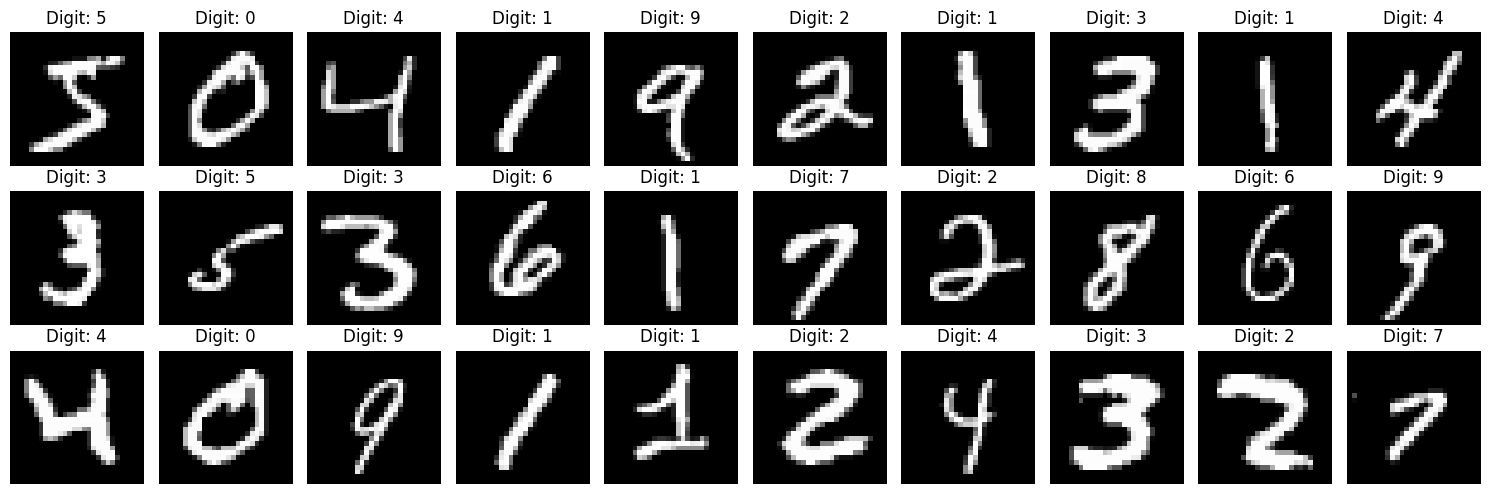


Training with ADAM optimizer:
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8210 - loss: 0.5674 - val_accuracy: 0.9814 - val_loss: 0.0652
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9684 - loss: 0.1081 - val_accuracy: 0.9851 - val_loss: 0.0511
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9774 - loss: 0.0775 - val_accuracy: 0.9881 - val_loss: 0.0428
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9809 - loss: 0.0616 - val_accuracy: 0.9894 - val_loss: 0.0398
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9844 - loss: 0.0527 - val_accuracy: 0.9894 - val_loss: 0.0387
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9868 - loss: 0.0427 - val_accuracy: 0.9893 - val_loss: 0.0408
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9880 - loss: 0.0371 - val_accuracy: 0.9900 - val_loss: 0.0391
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9895 - 

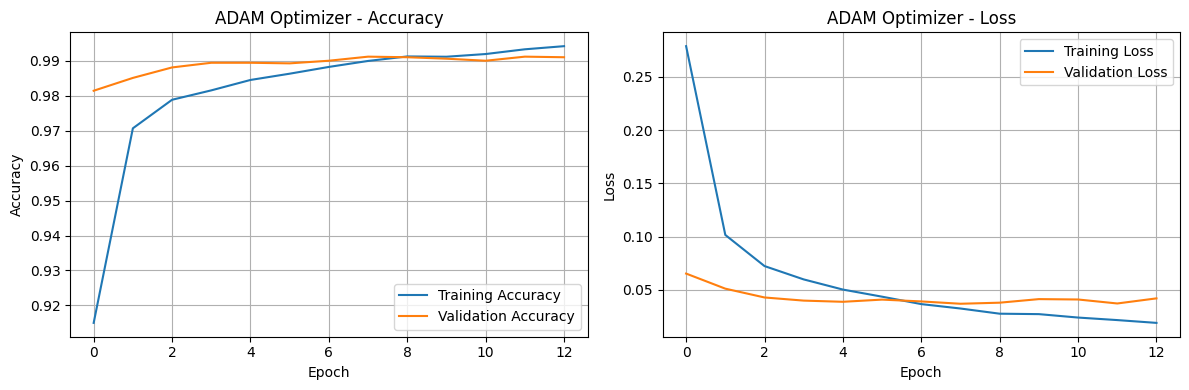


Training with SGD optimizer:
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3938 - loss: 1.8105 - val_accuracy: 0.9103 - val_loss: 0.3239
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8657 - loss: 0.4412 - val_accuracy: 0.9424 - val_loss: 0.1971
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9100 - loss: 0.3032 - val_accuracy: 0.9553 - val_loss: 0.1547
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9283 - loss: 0.2378 - val_accuracy: 0.9628 - val_loss: 0.1257
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9402 - loss: 0.2048 - val_accuracy: 0.9688 - val_loss: 0.1109
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9483 - loss: 0.1744 - val_accuracy: 0.9706 - val_loss: 0.1023
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9523 - loss: 0.1576 - val_accuracy: 0.9733 - val_loss: 0.0921
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9556 - l

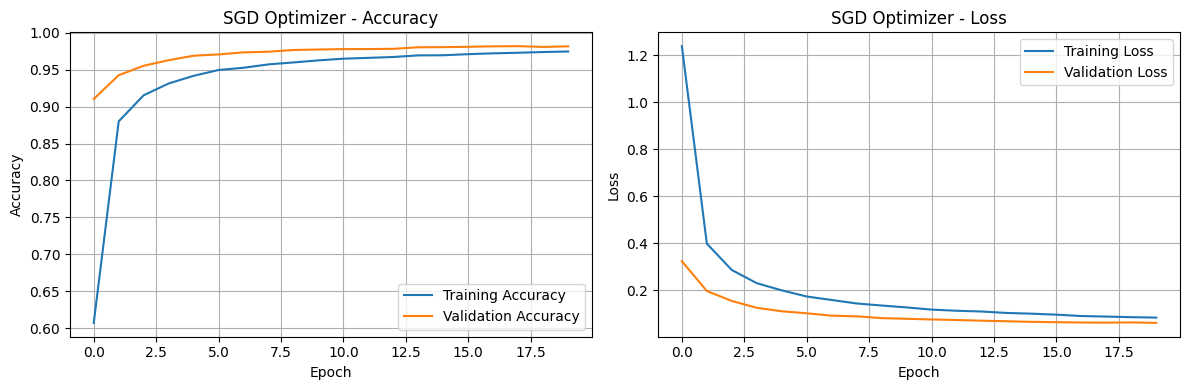


Training with RMSPROP optimizer:
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8268 - loss: 0.5459 - val_accuracy: 0.9811 - val_loss: 0.0643
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9682 - loss: 0.1033 - val_accuracy: 0.9852 - val_loss: 0.0512
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9785 - loss: 0.0700 - val_accuracy: 0.9872 - val_loss: 0.0440
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9837 - loss: 0.0542 - val_accuracy: 0.9886 - val_loss: 0.0433
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9871 - loss: 0.0431 - val_accuracy: 0.9901 - val_loss: 0.0418
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9873 - loss: 0.0406 - val_accuracy: 0.9902 - val_loss: 0.0422
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9906 - loss: 0.0329 - val_accuracy: 0.9904 - val_loss: 0.0399
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9908

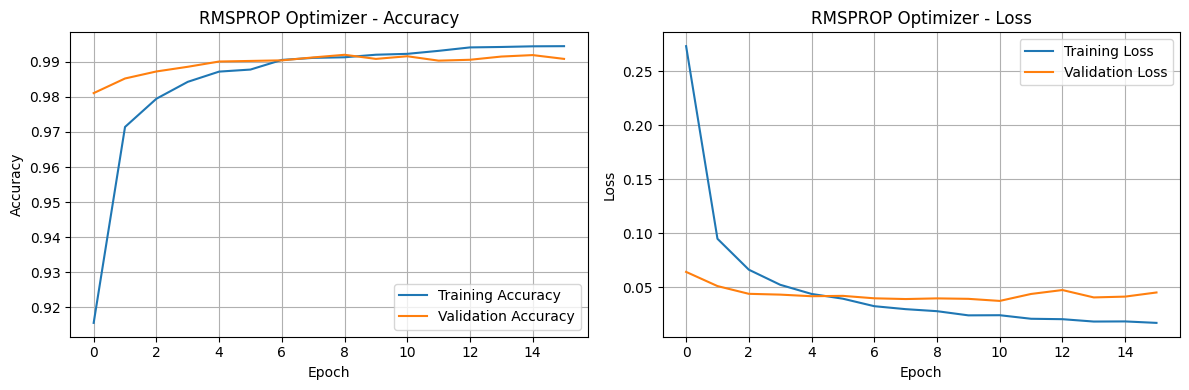


MNIST DIGIT CLASSIFICATION - MODEL PERFORMANCE SUMMARY

1. MODEL PERFORMANCE METRICS
--------------------------------------------------
Optimizer   Final Accuracy   Best Accuracy     Epochs
--------------------------------------------------
ADAM                 99.10%           99.12%         13
SGD                  98.15%           98.18%         20
RMSPROP              99.08%           99.20%         16

2. CONVERGENCE ANALYSIS
--------------------------------------------------


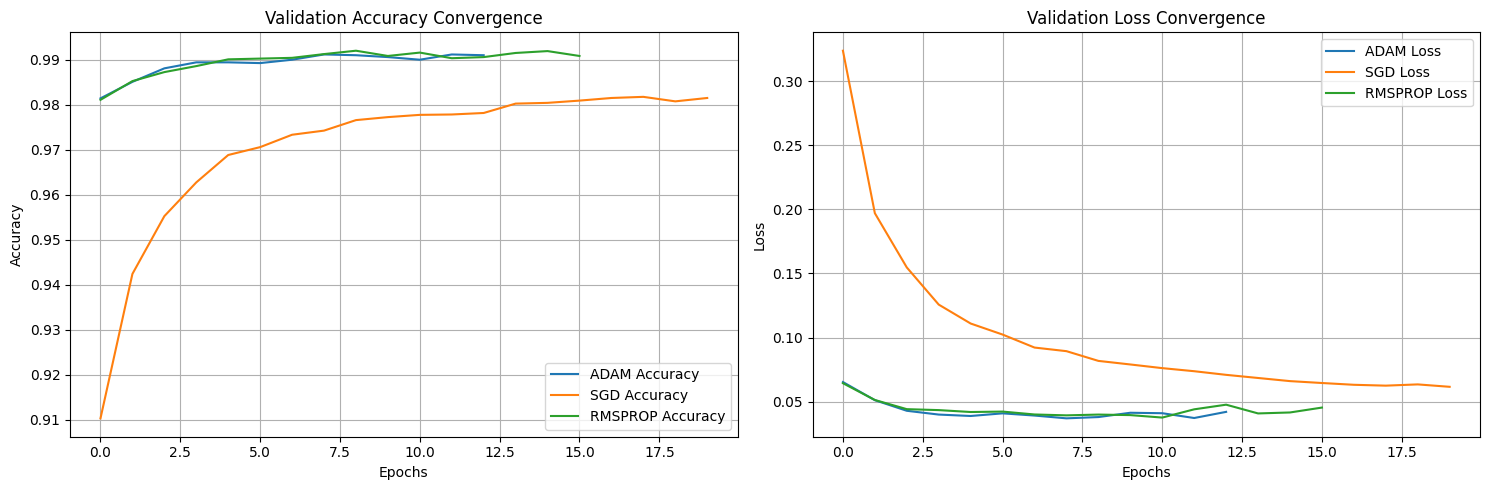

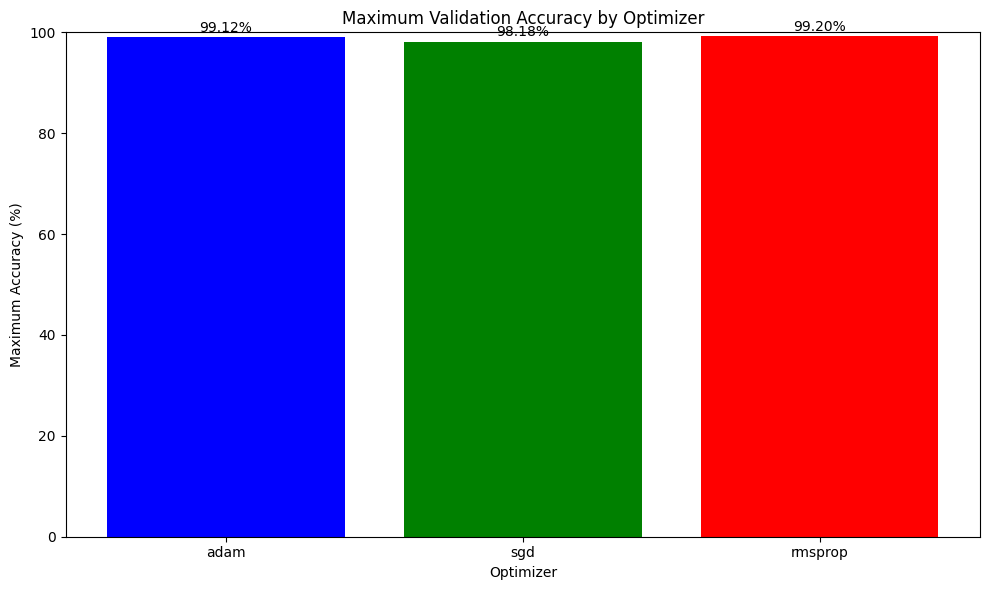


3. DETAILED PERFORMANCE ANALYSIS
--------------------------------------------------

ADAM Optimizer Analysis:
  - Best Validation Accuracy: 99.12%
  - Final Validation Accuracy: 99.10%
  - Best Validation Loss: 0.0369

SGD Optimizer Analysis:
  - Best Validation Accuracy: 98.18%
  - Final Validation Accuracy: 98.15%
  - Best Validation Loss: 0.0615

RMSPROP Optimizer Analysis:
  - Best Validation Accuracy: 99.20%
  - Final Validation Accuracy: 99.08%
  - Best Validation Loss: 0.0375

4. OVERALL CONCLUSION
--------------------------------------------------
Best Performing Optimizer: RMSPROP
Recommendations:
  1. Choose the optimizer based on your specific use case
  2. Consider computational efficiency alongside accuracy
  3. Experiment with hyperparameter tuning for further improvements


In [34]:
if __name__ == "__main__":
    main()